In [8]:
import os
import numpy as np
import random
import torch
import time
import optuna
from pathlib import Path
from DQN.train_dqn import train_dqn
from envs.GraphEnv.impnode import ImpnodeEnv
from DQN import DQN_agent_modular
%matplotlib inline

%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda


[autoreload of DQN.model_SumAgg_propagate failed: Traceback (most recent call last):
  File "C:\Users\rituja.pardhi\.conda\envs\impnode-gpu\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\rituja.pardhi\.conda\envs\impnode-gpu\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "C:\Users\rituja.pardhi\.conda\envs\impnode-gpu\lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'DQN.model_SumAgg_propagate'
]


In [9]:
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [10]:
# variables for training the agent

num_train_eps = 100000 #10000 number training episodes to run
num_mem_fill_eps = 100#1000 number of episodes to run to initialize the memory
discount = 0.99 # gamma used for computing return
batch_size = 64 # number of transitions to sample from replay buffer for each learn step
mem_capacity = 50000  # 500000 size of the memory buffer
update_frequency = 500 #1000 number of interactions after which the target buffer is updated
eps_max = 1.0 # initial epsilon value
eps_min = 0.05 # final epsilon value
eps_step = 5000 #1000 amount by which epsilon is decayed at each episode
lr = 0.0001 # learning rate for the network
alpha = 0.001 # weighing factor for graph reconstruction loss
val_step = 500
patience = 5
gnn_depth=4
state_size=2
hidden_size1=32
hidden_size2=64
action_size=1
n_step=3

num_nodes = (30, 50)
anc = 'dw_nd'
g_type = 'small-world'
val_data_path = 'data/synthetic_small_dataset/WS_val_30_50'
val_data_path = Path.cwd()/val_data_path

model_name = 'model'

In [11]:
results_base_path_train = "results/hyp_search_ws_train/{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}".format(
                           device, alpha, num_train_eps, num_mem_fill_eps, discount, batch_size, mem_capacity, update_frequency, eps_max, eps_min, eps_step, lr, gnn_depth, state_size, hidden_size1, hidden_size2, action_size, n_step, num_nodes, anc, g_type)

if not os.path.exists(results_base_path_train):
    os.makedirs(results_base_path_train)
else:
    timestamp = time.strftime("%Y%m%d%H%M%S")
    new_directory = f"{results_base_path_train}_{timestamp}"
    os.makedirs(new_directory)
    results_base_path_train = new_directory
    print(f"Directory already exists. Created a new one: {new_directory}")



In [12]:
env_train = ImpnodeEnv(anc=anc, 
                       g_type=g_type, 
                       num_nodes=num_nodes, 
                       mode='train',
                       
                       )

In [13]:
# create the dqn_agent
dqn_agent_train = DQN_agent_modular.DQNAgent(device,
                                             alpha=alpha,
                                             gnn_depth=gnn_depth,
                                             state_size=state_size,
                                             hidden_size1=hidden_size1,
                                             hidden_size2=hidden_size2,
                                             action_size=action_size,
                                             discount=discount,
                                             eps_max=eps_max,
                                             eps_min=eps_min,
                                             eps_step=eps_step,
                                             memory_capacity=mem_capacity,
                                             lr=lr,
                                             mode='train')


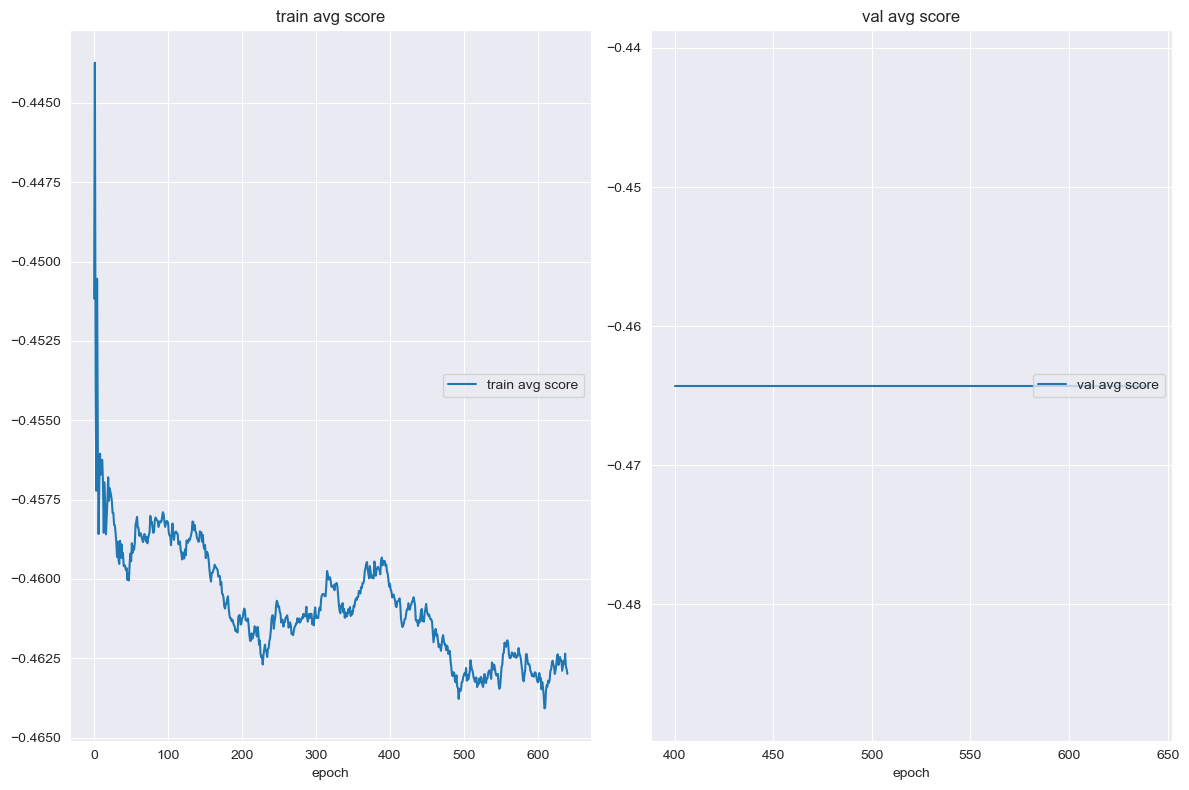

train avg score
	train avg score  	 (min:   -0.464, max:   -0.444, cur:   -0.463)
val avg score
	val avg score    	 (min:   -0.464, max:   -0.464, cur:   -0.464)


In [ ]:
train_dqn(env_train, dqn_agent_train, results_base_path_train, num_train_eps, num_mem_fill_eps, n_step, batch_size, update_frequency, val_data_path=val_data_path, model_name=model_name, val_step=val_step, patience=patience)


In [ ]:
print('done')

# visualize train and val performance

In [ ]:
path='results/cuda_0.001_3000_500_0.99_64_1500_100_1.0_0.05_100_0.001_4_2_32_64_1_3_(30, 50)_4_dw_nd_None_None_20240404151903'
import pandas as pd
import matplotlib.pyplot as plt
out = pd.read_csv('{}/info.csv'.format(path))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.set_ylabel('episode')
ax1.set_xlabel('train avg score')
ax2.set_xlabel('val avg score')
ax1.plot(out.ep_cnt, out.train_avg_score)
ax2.plot(out.ep_cnt, out.val_avg_score)